# split dataset for training and building Gender and age group classification model 

### **Step #1**: Import necessary Libraries and file path

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
##########################################################
import cv2
from PIL import Image
import imagehash
#########################################################33
from openpyxl import Workbook
from shutil import copyfile
import shutil
########################################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#######################################################
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
###########################################
# This is a simple keras or tensorflow.keras library import for CNN 
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input,Dropout
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
##################################################
from imblearn.under_sampling import RandomUnderSampler
from keras.callbacks import Callback
#######################################################
from scipy.stats import skew, kurtosis

# This is a simple keras library import for CNN 
print("cv2_version:",cv2.__version__)


cv2_version: 4.9.0


In [3]:
#saveMLmodelfile_name="MLarch#04_genderAge_modelep25"
%store -r saveMLmodelfile_name
print("modelname:", saveMLmodelfile_name)
%store -r project_path
print("project_path:", project_path)

#figure_dirPath='./model/'+str(saveMLmodelfile_name)+"/"+"/figure/"
# Ensure the train and test directories exist
#os.makedirs(figure_dirPath, exist_ok=True)

modelname: exp01_genderAge_model
project_path: d:\deep learning\project for deep learning\Gender_Age-group_classification_project


### **Step #4**: Pre-processing on the UTKFace_completeTrainDataset to UTKFace_ProcessedTestdataset

#### a) resize image for 200x200x3 to 100x100x3

In [11]:
# Function to resize images in a folder and save them in another folder
def resize_images(input_folder, output_folder, new_width, new_height):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of all files in the input folder
    # Loop through each file in the input folder
    for file in os.listdir(input_folder):
        # Get the full path of the input file
        input_path = os.path.join(input_folder, file)
        # Read the image using OpenCV
        image = cv2.imread(input_path)
        # Resize the image
        resized_image = cv2.resize(image, (new_width, new_height))
        # Get the file name (without extension)
        filename_without_extension = os.path.splitext(file)[0]
        # Construct the output path
        output_path = os.path.join(output_folder, filename_without_extension + ".jpg")
        # Save the resized image
        cv2.imwrite(output_path, resized_image)
        print(f"Image '{file}' resized and saved as '{filename_without_extension}.jpg'")

In [10]:
completeTest_datasetPath = project_path+ "/dataset//UTKFace_completeTrainDataset/"
processed_datasetPath = project_path+"/dataset\\UTKFace_Processed_Traindataset"


In [12]:

resize_images(completeTest_datasetPath, processed_datasetPath, 100, 100)

Image '10_0_0_20161220222308131.jpg.jpg' resized and saved as '10_0_0_20161220222308131.jpg.jpg'
Image '10_0_0_20161220222308131.jpg.jpg_0_1815.jpeg' resized and saved as '10_0_0_20161220222308131.jpg.jpg_0_1815.jpg'
Image '10_0_0_20161220222308131.jpg.jpg_0_5185.jpeg' resized and saved as '10_0_0_20161220222308131.jpg.jpg_0_5185.jpg'
Image '10_0_0_20161220222308131.jpg.jpg_0_6396.jpeg' resized and saved as '10_0_0_20161220222308131.jpg.jpg_0_6396.jpg'
Image '10_0_0_20161220222308131.jpg.jpg_0_660.jpeg' resized and saved as '10_0_0_20161220222308131.jpg.jpg_0_660.jpg'
Image '10_0_0_20161220222308131.jpg.jpg_0_7307.jpeg' resized and saved as '10_0_0_20161220222308131.jpg.jpg_0_7307.jpg'
Image '10_0_0_20161220222308131.jpg.jpg_0_9348.jpeg' resized and saved as '10_0_0_20161220222308131.jpg.jpg_0_9348.jpg'
Image '10_0_0_20161220222308131.jpg.jpg_0_9587.jpeg' resized and saved as '10_0_0_20161220222308131.jpg.jpg_0_9587.jpg'
Image '10_0_0_20170103200329407.jpg.jpg_0_2332.jpeg' resized and 

In [14]:
val_dirPath = project_path+"/dataset/UTKFace_valDataset"
processed_ValdatasetPath = project_path+"/dataset/UTKFace_Processed_Valdataset"
resize_images(val_dirPath, processed_ValdatasetPath, 100, 100)

Image '10_0_0_20170103200329407.jpg.jpg' resized and saved as '10_0_0_20170103200329407.jpg.jpg'
Image '10_0_0_20170103200522151.jpg.jpg' resized and saved as '10_0_0_20170103200522151.jpg.jpg'
Image '10_0_0_20170110220111082.jpg.jpg' resized and saved as '10_0_0_20170110220111082.jpg.jpg'
Image '10_0_0_20170110220235233.jpg.jpg' resized and saved as '10_0_0_20170110220235233.jpg.jpg'
Image '10_0_0_20170110220447314.jpg.jpg' resized and saved as '10_0_0_20170110220447314.jpg.jpg'
Image '10_0_0_20170110220514186.jpg.jpg' resized and saved as '10_0_0_20170110220514186.jpg.jpg'
Image '10_0_0_20170110220557169.jpg.jpg' resized and saved as '10_0_0_20170110220557169.jpg.jpg'
Image '10_0_0_20170110224255796.jpg.jpg' resized and saved as '10_0_0_20170110224255796.jpg.jpg'
Image '10_0_0_20170110224402264.jpg.jpg' resized and saved as '10_0_0_20170110224402264.jpg.jpg'
Image '10_0_0_20170110224524253.jpg.jpg' resized and saved as '10_0_0_20170110224524253.jpg.jpg'
Image '10_0_0_2017011022542153

#### b) show the image of  UTKFace_Processeddataset

In [15]:

processed_faceImage=[]

for img in os.listdir(processed_datasetPath): 
    processed_faceImage.append(np.array(cv2.imread(str(processed_datasetPath)+"/"+str(img),-1)))

totalprocessed_faceImage=len(processed_faceImage)
print("totalprocessed_faceImage: ", totalprocessed_faceImage)
#Extracting the height and width of an image
processed_faceImage_h, processed_faceImage_w,processed_faceImage_c = processed_faceImage[0].shape[:3]
# Displaying the height and width
print("UTKFace processed dataset image detail \nHeight = {}, Width = {}, channel={}".format(processed_faceImage_h, processed_faceImage_w,processed_faceImage_c)) 

totalprocessed_faceImage:  43461
UTKFace processed dataset image detail 
Height = 100, Width = 100, channel=3


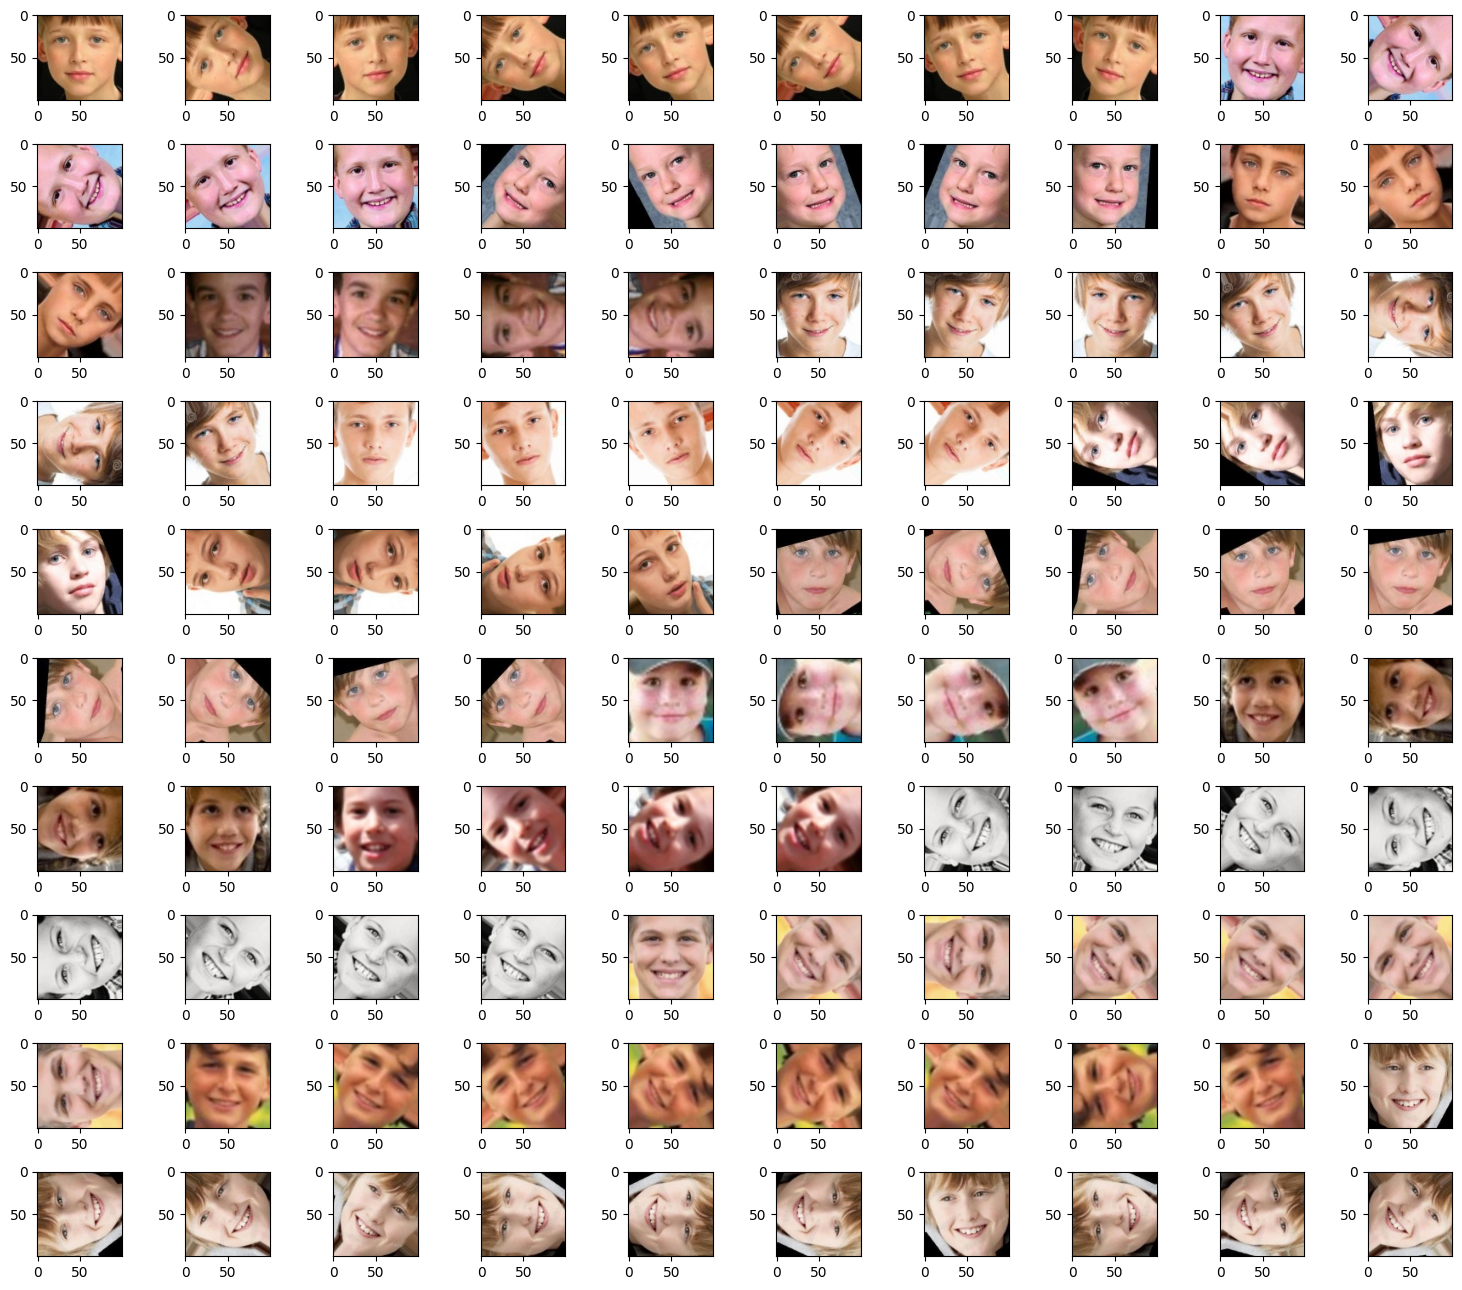

In [16]:
fig, ax = plt.subplots(10, 10, figsize=(15, 13)) 

k = 0
for i in range(10): 
     for j in range(10): 
         ax[i][j].imshow(cv2.cvtColor(processed_faceImage[k], cv2.COLOR_BGR2RGB)) 
         # ax[i][j].set_title('Label: {}'.format(pixels[k]))
         k += 1
plt.tight_layout()
plt.show()


### **Step #4**:  Exploratory Data Analysis  on the processed train dataset

#### 1) Label annotation extraction 

In [17]:
#path=[original_dataset_path , train_dirPath, test_dirPath]
processed_file=[]
processed_age = []
processed_gender = [] 

for img in os.listdir(processed_datasetPath):
  processed_file.append(img)
  processed_age.append(np.array(img.split("_")[0],np.uint64))
  processed_gender.append(np.array(img.split("_")[1],np.uint64))

processed_age = np.array(processed_age,np.uint64)
processed_gender = np.array(processed_gender,np.uint64)

print("lenght of processed_gender",len(processed_gender))
print(processed_gender)
print("lenght of processed_age",len(processed_age))
print(processed_age)
print("lenght of processed_file",len(processed_file))
print(processed_file)

lenght of processed_gender 43461
[0 0 0 ... 1 1 1]
lenght of processed_age 43461
[10 10 10 ...  9  9  9]
lenght of processed_file 43461
['10_0_0_20161220222308131.jpg.jpg', '10_0_0_20161220222308131.jpg.jpg_0_1815.jpg', '10_0_0_20161220222308131.jpg.jpg_0_5185.jpg', '10_0_0_20161220222308131.jpg.jpg_0_6396.jpg', '10_0_0_20161220222308131.jpg.jpg_0_660.jpg', '10_0_0_20161220222308131.jpg.jpg_0_7307.jpg', '10_0_0_20161220222308131.jpg.jpg_0_9348.jpg', '10_0_0_20161220222308131.jpg.jpg_0_9587.jpg', '10_0_0_20170103200329407.jpg.jpg_0_2332.jpg', '10_0_0_20170103200329407.jpg.jpg_0_5741.jpg', '10_0_0_20170103200329407.jpg.jpg_0_5804.jpg', '10_0_0_20170103200329407.jpg.jpg_0_5946.jpg', '10_0_0_20170103200329407.jpg.jpg_0_9152.jpg', '10_0_0_20170103200522151.jpg.jpg_0_3300.jpg', '10_0_0_20170103200522151.jpg.jpg_0_3997.jpg', '10_0_0_20170103200522151.jpg.jpg_0_6904.jpg', '10_0_0_20170103200522151.jpg.jpg_0_7420.jpg', '10_0_0_20170103200522151.jpg.jpg_0_9697.jpg', '10_0_0_20170103233459275.jpg

#### 2) Check Distribution of gender in raw dataset for any Class Imbalance

raw_gender: {0: 21730, 1: 21731}


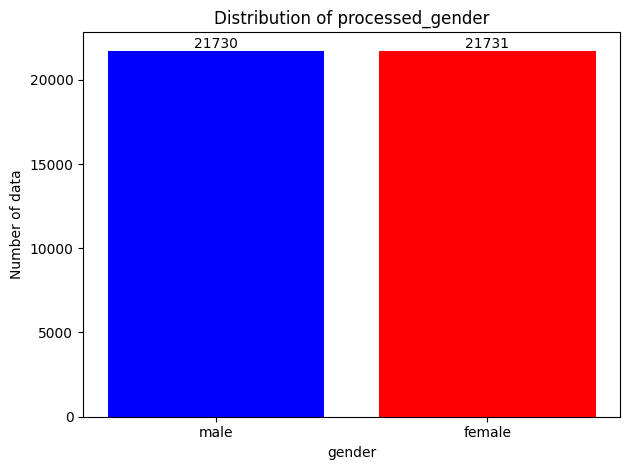

FileNotFoundError: [Errno 2] No such file or directory: './model/exp01_genderAge_model//figure/gender_Distribution_of processeddataset.png'

<Figure size 640x480 with 0 Axes>

In [18]:
#print(gender_dataset[gender
# Count male and female reviews
unique, counts = np.unique(processed_gender, return_counts=True)
processedgender_distribution = dict(zip(unique, counts))
print("raw_gender:",processedgender_distribution)
#_df = pd.DataFrame(gender_distribution[0], columns=gender_dataset.keys(), index = ['male', 'female'])
#print(_df)
# Visualize the distribution
plt.bar(processedgender_distribution.keys(), processedgender_distribution.values(), color=['blue', 'red'])
# Add text annotations to each bar
for i, value in enumerate(processedgender_distribution.values()):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title("Distribution of processed_gender")
plt.xlabel('gender')
plt.ylabel('Number of data')
plt.xticks([0, 1], ['male', 'female'])
plt.tick_params(labelleft=True)
plt.tight_layout()
# Display the plot
plt.show()
plt.savefig(figure_dirPath+"gender_Distribution_of processeddataset.png")


#### 3) Check Distribution of age for any Class Imbalance

list of age= [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
raw_age: {3: 1170, 4: 1278, 5: 900, 6: 498, 7: 563, 8: 1142, 9: 756, 10: 649, 11: 216, 12: 520, 13: 286, 14: 518, 15: 566, 16: 779, 17: 533, 18: 837, 19: 327, 20: 211, 21: 248, 22: 249, 23: 315, 24: 593, 25: 555, 26: 1675, 27: 622, 28: 912, 29: 549, 30: 737, 31: 329, 32: 697, 33: 161, 34: 464, 35: 1009, 36: 566, 37: 360, 38: 388, 39: 307, 40: 591, 41: 479, 42: 994, 43: 556, 44: 349, 45: 1468, 46: 628, 47: 639, 48: 625, 49: 667, 50: 1287, 51: 358, 52: 580, 53: 711, 54: 850, 55: 651, 56: 696, 57: 270, 58: 609, 59: 207, 60: 932, 61: 400, 62: 344, 63: 255, 64: 134, 65: 695}
length of age 63
max processedage_distribution: 1675
max_key: 26


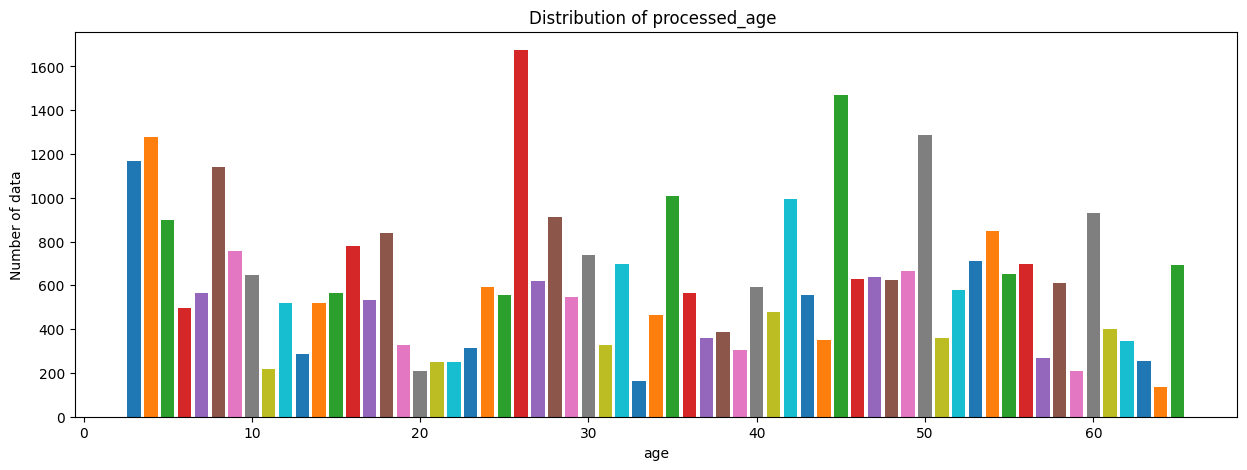

In [ ]:
#age_dataset={"raw_age":raw_age}
# Set the figure size
plt.figure(figsize=(15, 5))
#for age in age_dataset:
# Count male and female reviews
unique, counts = np.unique(processed_age, return_counts=True)
print("list of age=", unique)
processedage_distribution = dict(zip(unique, counts))
print("raw_age:",processedage_distribution)
print("length of age",len(processedage_distribution))

print("max processedage_distribution:" ,max(processedage_distribution.values()))
max_key = max(processedage_distribution, key=lambda k: processedage_distribution[k])
print("max_key:",max_key)

#if age_distribution.values()==max(age_distribution.values()) :
#    print(age_distribution.keys)
# Visualize the distribution
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.bar(processedage_distribution.keys(), processedage_distribution.values(), color=colors)#['blue', 'red'])
plt.title("Distribution of processed_age ")
plt.xlabel('age')
plt.ylabel('Number of data')
plt.tick_params(labelbottom=True)
#plt.xticks([0, 1], ['male', 'female'])

plt.show()




no of file image:  [3846. 3110. 1022. 1863. 1697. 1023. 2823. 2083. 1763. 2200. 1055. 2064.
 2373. 2559. 2225. 2212. 1575. 1883. 1084.]
interval of bin:  [ 3.  7. 11. 14. 17. 20. 24. 27. 30. 33. 37. 40. 43. 46. 50. 53. 56. 59.
 63. 65.]


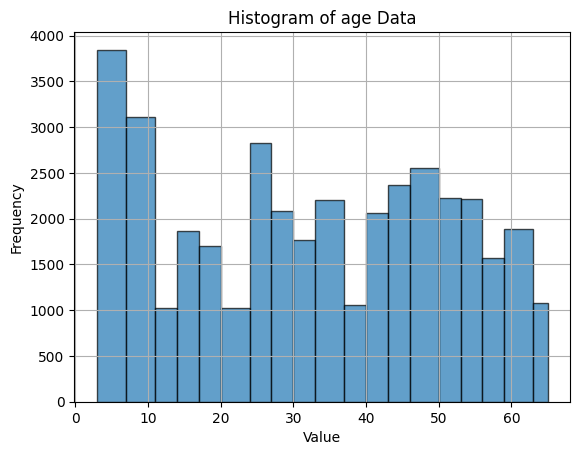

In [ ]:

# Create histogram with custom bins and colors
%store -r modified_rounded_doanes_binEdge
hist2=plt.hist(processed_age, bins=modified_rounded_doanes_binEdge,  alpha=0.7, edgecolor='black')
print("no of file image: ",hist2[0])
print("interval of bin: ",hist2[1])

plt.title('Histogram of age Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 4) Check two-way Distribution of age and gender for any two-Class Imbalance

In [ ]:
processed_gender
def countGender_MF(face_gender):   
    unique, counts = np.unique(face_gender, return_counts=True)
    #print("list of age=", unique)      
    processedgender_distribution = dict(zip(unique, counts))
    #print("raw_gender:",processedgender_distribution)
    return processedgender_distribution 


age_classname:  ['child_3_6', 'kid_7_12', 'teenager_13_19', 'EarlyAdulthood_20_26', 'EarlyAdulthood_27_32', 'YoungAdulthood_33_40', 'middleAdulthood_41_45', 'middleAdulthood_46_50', 'middleAdulthood_51_56', 'senior_57_65']
lower_agelimit:  [3, 7, 13, 20, 27, 33, 41, 46, 51, 57]
upper_agelimit [6, 12, 19, 26, 32, 40, 45, 50, 56, 65]


            ageGroup_L_H  total_face  Male_Count  Female_Count
0              child_3_6        3846        1923          1923
1               kid_7_12        3846        1923          1923
2         teenager_13_19        3846        1923          1923
3   EarlyAdulthood_20_26        3846        1923          1923
4   EarlyAdulthood_27_32        3846        1923          1923
5   YoungAdulthood_33_40        3846        1923          1923
6  middleAdulthood_41_45        3846        1923          1923
7  middleAdulthood_46_50        3846        1923          1923
8  middleAdulthood_51_56        3846        1923          1923
9           senior_57_65        38

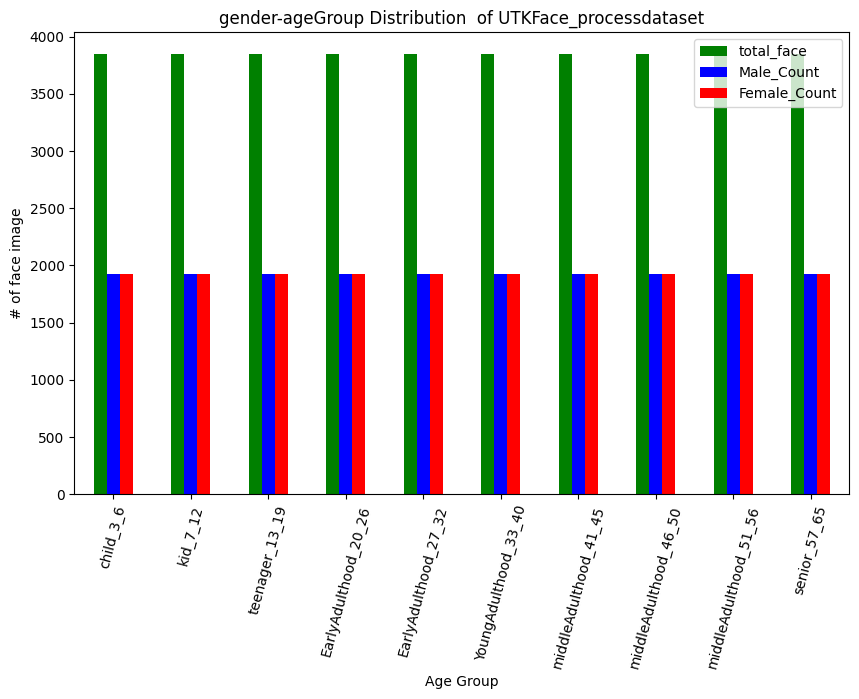

In [ ]:
# classname= ['toddle_1_2',
#             'kid_3_12',
#             'teenager_13_19',
#             'EarlyAdulthood_20_24',
#             'EarlyAdulthood_25_27',
#             'YoungAdulthood_28_30',
#             'YoungAdulthood_31_33',
#             'YoungAdulthood_34_36',
#             'YoungAdulthood_37_40',
#             'middleAdulthood_41_45',
#             'middleAdulthood_46_50',
#             'middleAdulthood_51_55',
#             'middleAdulthood_56_63',
#             "senior_64_70",
#             "senior_71_116"]
%store -r age_classname
print("age_classname: ", age_classname)

classname_dict_ageGender={}
#lower_agelimit=[]
#upper_agelimit=[]

#for agevariable in age_classname:
 #   lower_agelimit.append(int(agevariable.split("_")[1]))
 #   upper_agelimit.append(int(agevariable.split("_")[2]))


%store -r lower_agelimit
%store -r upper_agelimit

print ("lower_agelimit: ", lower_agelimit)
print ("upper_agelimit",upper_agelimit)


age_bagg=[]
gender_bagg=[]

for classe,lowerage,upperage in zip(age_classname,lower_agelimit,upper_agelimit):
    #print(classe,lowerage,upperage)
    for age,gender in zip(processed_age,processed_gender):
        if age>=(lowerage) and age<=upperage:
            age_bagg.append(age)
            gender_bagg.append(gender)
            classname_dict_ageGender[(classe)]=[len(age_bagg), (countGender_MF(gender_bagg))]  
    age_bagg.clear()
    gender_bagg.clear()
    
#print("\nclassname_dict: ",classname_dict_ageGender)
print("\n")

# Initialize lists to store data
row = []
# Iterate over all age groups and their counts
for age_group, count_data in classname_dict_ageGender.items():
    total_count = count_data[0]
    male_count = count_data[1][0]
    female_count = count_data[1][1]
    # Append data to list
    row.append({'ageGroup_L_H': age_group,'total_face': total_count, 'Male_Count': male_count, 'Female_Count': female_count})

# Create DataFrame from the list of dictionaries
twoWay_table = pd.DataFrame(row)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size to width=10 and height=6
twoWay_table.plot.bar(x='ageGroup_L_H', ax=ax, rot=75, color=['green', 'blue', 'red'])
ax.set_xlabel("Age Group")  # Set the label for the x-axis
ax.set_ylabel("# of face image")  # Set the label for the x-axis

plt.title('gender-ageGroup Distribution  of UTKFace_processdataset')# Display DataFrame
print(twoWay_table)
print("\n")
summary_dict={ "total_face":twoWay_table['total_face'].sum(), "total_MaleCount": twoWay_table['Male_Count'].sum(), "total_FemaleCount":twoWay_table['Female_Count'].sum()}
#print(summary_dict)
# Convert summary_dict to DataFrame
summary_df = pd.DataFrame([summary_dict])
print(summary_df)
